<a href="https://colab.research.google.com/github/bzynpb/NLP/blob/main/NLP_5_(Fine_Tuning_For_BERT_models_with_TPU)_bzb_16_Jul_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning For BERT Models with TPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
# TPU kullaniminda cekirdek tahsislerini alabilmek icin bu kodu calistirmak gerekiyor

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.86.139.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.86.139.26:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 101 kB 11.1 MB/s 
     |████████████████████████████████| 6.6 MB 40.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/hepsiburada.csv', encoding="utf-8")

In [ ]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [ ]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

In [ ]:
df.Rating = df.Rating.map({1:0, 0:1})
# skorlari daha iyi takip edebilmek icin hedef label 1 yaptik 

In [ ]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [ ]:
X = df['Review'].values
y = df['Rating'].values

## Tokenization

### Fixing token counts of all documents

In [69]:
from transformers import AutoTokenizer # AutoTokenizer tum bert modellerinde calisir

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")
# uncased: datamda butuk tokenler kucuk harflere donusturulur, egitim kucuk harfler uzerinden yapilir
# cased: buyuk ve kucuk harflere dikkat ederek egitir
# translation, quastion/answer yapiliyorsa cased tercih edilir
# uncased oldugunda turkce karakterleri okuyamiyor o yuzden manuel olarak lower yapacagiz. 
# https://huggingface.co/bert-base-uncased detayli kullanim incelemesi icin (tensorflow dikkate alarak)

max_len = 0

# For every sentence...
max_token = [] # her yorumun kac tokenden olustugunu saymak istiyoruz
# token sayisini sayarak sonraki asamada en az kayipla kac tokene sabitlemeliyiz onu hesaplayacagiz 

for sent in X:

    # add_special_tokens=True ile baslangic ve bitis tokenlerini ilave ediyoruz
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent.lower(), #uncase turkcede calismadigi icin manuel degistirdik
                                 add_special_tokens=True)
    
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)
# bert modeli en fazla 512 token hafizasinda tutuyordu
# bizim modelimizde 758 tokenli olan veri oldugu icin hata verir 

Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  758


In [70]:
text = "Şentepeli Şükrü abi?😊".lower()
 
tokenizer.tokenize(text)

['şen', '##tepe', '##li', 'şük', '##rü', 'abi', '?', '😊']

In [71]:
sentence = "Şentepeli Şükrü abi?😊".lower()
tokens = tokenizer.encode(sentence,
                          add_special_tokens=True) # basina sonuna ozel tokenleri ilave et 
print(tokens)
print(len(tokens))

# 

[2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 992, 3]
10


In [72]:
sentence = "Şentepeli Şükrü abi?".lower()
tokens = tokenizer.encode_plus(sentence,
                               add_special_tokens=True)
print(tokens)

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [73]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))

[ True False  True  True False False]
3


In [74]:
np.array(max_token).mean()

36.4837390193719

In [75]:
sum(np.array(max_token) < 160) / len(max_token)

0.9877000537994308

In [76]:
def transformation(X):
  # set array dimensions, hem text hem label ayri ayri boyutlandiriyorum
  seq_len = 160 # tum yorumlarim 160 tokenden olusacak
  num_samples = len(X) # toplam yorum sayim

  # initialize empty zero arrays, sifirlardan olusan matris olusturuyorum
  # index:yorum sayim x sutun:token sayim
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X): # her yorumumun basina bir sayi veriyor

      tokens = tokenizer.encode_plus(phrase.lower(), # encode_plus hem padding hem truncation yapar
                                     # encode_plus benim tum ihtiyacim olan texti veriyor, 
                                     # texti hem input hem attention'a vectorel donusturebiliyorum
                                     max_length=seq_len, # en uzun yorum 160 tokenden olusacak
                                     truncation=True, # kirpma islemi yapacak
                                     padding='max_length', # doldurma islemini max_lenght'e gore doldurur 
                                     # seq_len ya da 160 vs yazarsam hatali olur, orjinal haliyle kalir 
                                     # o yuzden oncelikle max_length tanimlayip onu kullanmaliyiz
                                     add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids'] # tokenizer.encode_plus kodunu calistirdiktan sonra cikan degeri aliyor
      Xmask[i, :] = tokens['attention_mask'] # ilgili indexse attention_masktan gelen degerleri atar 
  return Xids, Xmask

In [77]:
Xids, Xmask = transformation(X)
# tokenizer.encode_plus kodundan cikan 'input_ids' ve 'attention_mask' degerlerimin donusturme islemini tamamladim

In [78]:
Xids.shape

(243497, 160)

In [79]:
Xmask.shape

(243497, 160)

In [80]:
# ornek: 
sentence = "Şentepeli Şükrü abi?"
tokens = tokenizer.encode_plus(sentence.lower(),
                               max_length=20,
                               truncation=True,
                               padding='max_length',
                               add_special_tokens=True)
print(tokens)
# 20 uzunlugunda olacak sekilde sifirlar ile doldurdu 
# kac token oldugunu 'attention_mask' ile goruyoruz 

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [81]:
np.zeros((5, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [82]:
Xids

array([[2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.7820e+03, 3.1200e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 3.8070e+03, 9.2500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1560e+03, 4.1650e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.6807e+04, 1.9870e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [83]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [84]:
from tensorflow.keras.utils import to_categorical
# kac label varsa matrix formatta kategoriklestiriyor

l = np.array([4, 1, 2, 3, 0])
to_categorical(l, 5) 

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [85]:
l = np.array([0,1])
to_categorical(l,2)
# eger data binary ise tavsiye edilen tek sutunluk hale donusturmek

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [86]:
np.array([1, 0, 1, 0, 0]).reshape(-1,1) 
# binary icin tavsiye edilen yontem

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [87]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
labels = y.reshape(-1,1)
# tum yorumlarim tek boyutlu matrixe donustu
labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [89]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [90]:
len(dataset)

243497

In [91]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels # mutlaka dict olmali 
# neresi label-neresi input ayrim burada yapiliyor

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func) # donusumu yapiyor

In [92]:
dataset
# hangi tensor id, hangisi attention_mask muamelesi yapiyor cevapta gorebiliyoruz. Artik modelim hepsini biliyor

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(160,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(160,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

token type ids (segment embeddings) hem inputumuz hem de outputumuz birer sepuantial  datadan (yani cümleden) oluşuyorsa modelin hangi cümlenin input hangi cümlenin de output olduğunu anlaması için kullandığı bir vektördür.
- translation, soru cevap, sentence similarity modellerinde bu vektörü kullanıyoruz . Classificationda gerek duymuyoruz. çünkü outputumuz bir cümle değil sadece tek bir tokenden oluşuyor

## Train Test Split

In [93]:
batch_size = 32 #16
# bert modelini tanitan makale: batch_size 31 veya 16 kullanilmasini tavsiye eder

# shuffle and batch
# fit into a batch of 32
dataset = dataset.shuffle(243500, 
                          reshuffle_each_iteration=False).batch(batch_size, # 32li paketlere/tensorlere donusuyor
                                                                #overfitting endisesi yoksa true diyebiliriz ama tercih edilmez !!!
                                                                drop_remainder=True) # son batch_size icinde 32den az bir paket olabilir
                                                                # son kalan batch_size 32'den az ise son paketi dusur. 
                                                                # ignore etmek icin de False kullanilir
                          
# datanin karma ve paketlere bolme islemi(batch_size) burada yapilir

# reshuffle_each_iteration=False yerine true olarak kalirsa train ile egitim yaptiktan sonra 
# 1.epochtan sonra 2.epochta ilk epochta test olan traine kayar, her epochta devam eder.
# her epochta train ve test setini degistiriyor, bu sayede overfitting controlu yapilamaz
# false olursa test-train sabit kalir, true olursa karisir. biz sabit kalmasini tercih ediyoruz

In [94]:
dataset

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [95]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size) # skip:geri kalan paketlerin ilgili datasetine/validation data setine gonder

In [96]:
print(len(dataset))
print(len(dataset)*0.9)
print(int(len(dataset)*0.9))
# datada 7609 adet 32li paket var
# bu paketlerin %90ini (6.848) train setine aticam, kalani teste gondericem

7609
6848.1
6848


In [97]:
Xids.shape

(243497, 160)

In [98]:
#batch_size=32
int(Xids.shape[0]/batch_size)

7609

## Creating Model

In [99]:
## modeli func olarak tanimlayip sonra calistirmaliyiz
# TPU cekirdeklerin hizindan faydalanabilmek icin 
def create_model():
    from transformers import TFAutoModel ## model import etme ve yazma mutlaka def icinde olmali
                                         # def disinda yazilmasi halinde def fonksiyonu kullaniminda hata verir
    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-cased") # tokenizasion isleminde ne kullandiysak aynen kullanilmali
    # tavsiye edilen automodel
    #TFAutoModel tensorflow kutuphanesinin islemleriyle devam edebilmek icin tfautomodel kullandik


    input_ids = tf.keras.layers.Input(shape=(160,), # sabit boyut ne ise o kullanilmali
                                      # her yorum tek satirlik gelecegi icin model tek satirlik islem yapiyor
                                      name='input_ids', # tensorflow icine verdigimiz isimler ne ise aynen kullanilmali
                                      dtype='int32') # 
    
    attention_mask = tf.keras.layers.Input(shape=(160,),
                                           name='attention_mask', # tensorflow icinde verdilen isimler kullanilmaz ise hata verir
                                           dtype='int32')

    embeddings = model.bert(input_ids=input_ids,
                            attention_mask=attention_mask)["pooler_output"] #[1] en son layerda, egitim sonrasi bunyesinde tuttugu tum embedingleri cekiyor 
                            # butun word_embeddingleri burada olusturuyorum

    x = tf.keras.layers.Dense(160, activation='relu')(embeddings) # sequential modellerde model.add derdik 
                                                                  # burada modelin eklenmesi farkli 
                                                                  # overfittin gidermek icin danse layer noron sayisini azaltabiliriz

    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1 # yukaridaki layer'i alip dropout uygular

    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x) # en son tahmin yapilacak dense layer'a aktar
                                                # dropout 0.1 degeri tavsiye edilen deger 

    ## Functional API
    ## Sequential yapi yok, hazir veri cekildigi icin bu yapi kullaniliyor

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [100]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [101]:
#pd.Series(y).value_counts(normalize=True)

In [102]:
#weights = {0:0.05, 1:0.95}

In [103]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                         

In [104]:
history = model3.fit(train_ds,
                     validation_data= val_ds,
                     epochs=1) #epoch= 2 or 3 # overfittinge gitmemek icin 2 veya 3 kullanim tavsiye edilir

6848/6848 [==============================] - 653s 85ms/step - loss: 0.0760 - recall_2: 0.6791 - val_loss: 0.0677 - val_recall_2: 0.7901


## Model evaluation

In [105]:
# y_train ve y_test yoktu 
# yukarida shuffle ederken neye gore karistigini, hangi indexlere tekabul ettigini da bilmiyoruz. 
# y_pred karsilastiracak degerimiz olmadigi icin val_ds'den yararlaniriz

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5 # 

y_test = []
for i in val_ds:
  for j in np.array(i[1]):
    y_test.append(j)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23056
           1       0.80      0.79      0.79      1296

    accuracy                           0.98     24352
   macro avg       0.89      0.89      0.89     24352
weighted avg       0.98      0.98      0.98     24352



In [106]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = []
for i in train_ds:
  for j in np.array(i[1]): # data icinde gecen tum labelleri cekiyorum
    y_train.append(j) # labelleri cekerek y_train olusturuyorum

print(classification_report(y_train, y_train_pred)) 

# her bir tensorden (32li paketli datadan) gercek degerleri alarak y_traine manuel olarak atiyorum
# tensoru array yapinca daha hizli calisiyor 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    206757
           1       0.88      0.87      0.87     12379

    accuracy                           0.99    219136
   macro avg       0.94      0.93      0.93    219136
weighted avg       0.99      0.99      0.99    219136



In [54]:
y_pred = model3.predict(train_ds)>=0.5

y_test = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    206825
           1       0.91      0.84      0.87     12311

    accuracy                           0.99    219136
   macro avg       0.95      0.92      0.93    219136
weighted avg       0.99      0.99      0.99    219136



In [107]:
val_ds # bir yoruma ait verilerim 
# berk modele datami 32lik paketler halinde verdim, bu paketlerden 1 degeri :

<SkipDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [108]:
for i in val_ds:
  print(np.array(i[1])) # sadece label kismiyla ilgilendigim ixin 
  break

  # gercek y_test degerim

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
 #Ağırlıklandırılmış Model ---> dropout(0,1), batchsize = 16, epoch =1, learning rate = 2e-5
 
#  TEST SET
#                 precision    recall  f1-score   support

#            0       0.99      0.97      0.98     22987
#            1       0.63      0.89      0.74      1365

#     accuracy                           0.96     24352
#    macro avg       0.81      0.93      0.86     24352
# weighted avg       0.97      0.96      0.97     24352

# TRAIN SET
#                 precision    recall  f1-score   support

#            0       1.00      0.97      0.99    206825
#            1       0.69      0.95      0.80     12311

#     accuracy                           0.97    219136
#    macro avg       0.84      0.96      0.89    219136
# weighted avg       0.98      0.97      0.98    219136



history = model3.fit(train_ds,
                     validation_data= val_ds,
                     epochs=1,
                    #  class_weight=weights
                     )

NameError: ignored

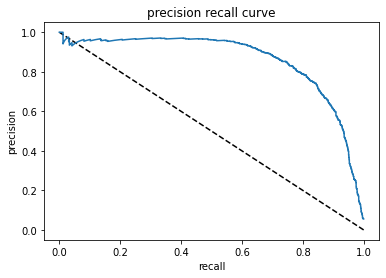

In [109]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [110]:
average_precision_score(y_test, y_pred_proba)

0.8609190357748078

In [111]:
model3.save("sentiment_model_without_weighted.h5")

In [113]:
from tensorflow.keras.models import load_model


model4 = load_model('sentiment_model_without_weighted.h5')

In [114]:
# initialize tokenizer from transformers
from transformers import AutoTokenizer, TFAutoModel

tokenizers = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

def prep_data(text):
    # tokenize to get input IDs and attention mask tensors
    tokens = tokenizers.encode_plus(text.lower(), max_length=160,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf')
  
    return {'input_ids': tokens['input_ids'],      #tf.cast(tokens['input_ids'], tf.int32)
            'attention_mask': tokens['attention_mask']} #tf.cast(tokens['attention_mask'], tf.int32)

In [115]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
review15 = "alınca anlarsın anyayı konyayı"
review16 = "çöpe atacak paran varsa alabilirsin"
review17= "Telefon fena değil"
review18 = "al da gününü gör"
review19 = "Ürün süper ama satıcı ve kargo berbat"
review20= "kargo süper ama ürün berbat"
review21 = "Aldigim TV cok kaliteli diye dusunmustum, sonradan cok da iyi bir TV olmadigini dusundum, ama neyse yine de memnunum."
review22 = "😊"
review23 = ":)"
review24= "I ❤️ you"
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16, review17, review18, review19, review20, review21, review22, review23, review24]

In [116]:
probs = []
for i in reviews:

  in_tensor = prep_data(i) 

  prob = model4.predict(in_tensor)[0][0]

  probs.append(prob)

In [117]:
in_tensor

{'attention_mask': <tf.Tensor: shape=(1, 160), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]], dtype=int32)>,
 'input_ids': <tf.Tensor: shape=(1, 160), dtype=int32, numpy=
 array([[    2,    77,   610,  1354, 13799,     3,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0

In [118]:
model4.predict(in_tensor)
# bana olasilik donduruyor

array([[0.0032222]], dtype=float32)

In [119]:
probs

[0.00040441751,
 0.00065395236,
 0.99542606,
 0.00850147,
 0.18041715,
 0.9963112,
 0.00083976984,
 0.9895197,
 0.00037765503,
 0.9957949,
 0.00038018823,
 0.013053,
 0.98322994,
 0.011091739,
 0.043091387,
 0.38494235,
 0.3185465,
 0.0039348006,
 0.06935799,
 0.98921174,
 0.03562343,
 0.0097261965,
 0.0017398,
 0.0032221973]

In [120]:
classes  = (np.array(probs) >= 0.5).astype("int")
classes

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [121]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [122]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)

,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.000404,0
1,süper ürün aynı gün elime geçti,0.000654,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.995426,1
3,kelimelerle tarif edilemez,0.008501,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.180417,0
5,hiç resimde gösterildiği gibi değil,0.996311,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler,0.000840,0
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.989520,1
8,tam bir fiyat performans ürünü,0.000378,0
9,beklediğim gibi çıkmadı,0.995795,1


In [123]:
count=0
for i in X:
  if "gününü gör" in i.lower():
    count+=1
print(count)

0
